<a href="https://colab.research.google.com/github/OsitadinmaD/business-funding-data-cleaning/blob/main/business_funding_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fetching The Business File From My Google Drive

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
file_path = '/content/drive/My Drive/3mtt assignment/Business Funding Data.csv'

df = pd.read_csv(file_path, encoding= 'latin1')
df.head()

,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
0,trafigura.com,NaN,2024-03-14T01:00:00+01:00,NaN,NaN,[],NaN,NaN,$1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...
1,zenobe.com,NaN,2024-05-31T02:00:00+02:00,NaN,NaN,[],"avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,$522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...
2,zenobe.com,NaN,2024-07-24T02:00:00+02:00,NaN,NaN,"[""private_equity""]",NaN,NaN,£41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...
3,canva.com,NaN,2024-05-01T02:00:00+02:00,NaN,NaN,[],stackcapitalgroup.com,1.0,US$8 million,8000000,https://www.globenewswire.com/news-release/202...
4,fidelity.com,NaN,2024-04-11T02:00:00+02:00,NaN,NaN,[],chevychasetrust.com,1.0,$1.96 million,1960000,https://www.defenseworld.net/2024/04/11/chevy-...


Checking the data set's info to understand it better

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Website Domain             26 non-null     object 
 1   Effective date             6 non-null      object 
 2   Found At                   26 non-null     object 
 3   Financing Type             8 non-null      object 
 4   Financing Type Normalized  8 non-null      object 
 5   Categories                 26 non-null     object 
 6   Investors                  13 non-null     object 
 7   Investors Count            13 non-null     float64
 8   Amount                     26 non-null     object 
 9   Amount Normalized          26 non-null     int64  
 10  Source Urls                26 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.4+ KB


From The data set info displayed above the following observations were made:
1. The data set has 26 records (rows) and 11 features (columns)
2. The data set has 9 categorical features and 2 numerical features
3. All the columns except Website domain, Found at, Categories, Amount, Amount Normalized, Source Urls have missing values

**Handling the Categorical Missing Values in the dataset**

In [70]:
missing_values = df.isnull().sum()
print("Missing values per column:")
display(missing_values)

Missing values per column:


,0
Website Domain,0
Effective date,20
Found At,0
Financing Type,18
Financing Type Normalized,18
Categories,0
Investors,13
Investors Count,13
Amount,0
Amount Normalized,0


From the above data, its observed that effective date, financing Type and Financing type normalized has a lot of missing values when compared to the size of the dataset.
Hence I'm going to check for the unique values of each of these columns.

In [71]:
df['Effective date'].unique()

array([nan, '2024-04-18T02:00:00+02:00', '2024-04-16T02:00:00+02:00',
       '2024-06-20T02:00:00+02:00', '2024-04-24T02:00:00+02:00',
       '2024-06-26T02:00:00+02:00', '2024-06-27T02:00:00+02:00'],
      dtype=object)

From the above information Effective date column has 6 unique values which makes up the complete data set (ie 20 (missing values) + 6 (unique values)).
Hence, based on my preference filling the remaining columns may no be ideal as all the values has equal mode. Therefore I will drop the column.

In [72]:
df.drop(columns=['Effective date'], inplace=True)
df

,Website Domain,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
0,trafigura.com,2024-03-14T01:00:00+01:00,NaN,NaN,[],NaN,NaN,$1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...
1,zenobe.com,2024-05-31T02:00:00+02:00,NaN,NaN,[],"avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,$522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...
2,zenobe.com,2024-07-24T02:00:00+02:00,NaN,NaN,"[""private_equity""]",NaN,NaN,£41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...
3,canva.com,2024-05-01T02:00:00+02:00,NaN,NaN,[],stackcapitalgroup.com,1.0,US$8 million,8000000,https://www.globenewswire.com/news-release/202...
4,fidelity.com,2024-04-11T02:00:00+02:00,NaN,NaN,[],chevychasetrust.com,1.0,$1.96 million,1960000,https://www.defenseworld.net/2024/04/11/chevy-...
5,swtchenergy.com,2024-04-24T02:00:00+02:00,Series B,series_b,"[""series_b"", ""venture""]","alantra.com, blueearth.capital",2.0,$27.2 Million,27200000,https://www.mercomindia.com/funding-and-ma-rou...
6,carnow.com,2024-04-16T02:00:00+02:00,NaN,NaN,"[""debt_financing""]",runwaygrowth.com,1.0,$40 million,40000000,https://www.prnewswire.com/news-releases/runwa...
7,databricks.com,2024-08-07T02:00:00+02:00,Series I,series_i,"[""series_i"", ""venture""]",NaN,NaN,$685 million,685000000,https://iteuropa.com/news/large-language-model...
8,anthropic.com,2024-07-08T02:00:00+02:00,NaN,NaN,[],damachotelsandresorts.com,1.0,$50mn,50000000,https://www.arabianbusiness.com/industries/tec...
9,ey.com,2024-04-18T02:00:00+02:00,NaN,NaN,[],NaN,NaN,AU$10.7M,6865000,https://www.biometricupdate.com/202404/ey-secu...


In [73]:
df['Financing Type'].unique()


array([nan, 'Series B', 'Series I', 'Seed', 'Series A2', 'Series A'],
      dtype=object)

From the information above i can fill up the remaining missing values using the mode of the column data


In [74]:
# Fill missing values in 'Financing Type' with the mode
df['Financing Type'].fillna(df['Financing Type'].mode()[0], inplace=True)

df

/tmp/ipython-input-1264145861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financing Type'].fillna(df['Financing Type'].mode()[0], inplace=True)


,Website Domain,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
0,trafigura.com,2024-03-14T01:00:00+01:00,Seed,NaN,[],NaN,NaN,$1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...
1,zenobe.com,2024-05-31T02:00:00+02:00,Seed,NaN,[],"avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,$522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...
2,zenobe.com,2024-07-24T02:00:00+02:00,Seed,NaN,"[""private_equity""]",NaN,NaN,£41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...
3,canva.com,2024-05-01T02:00:00+02:00,Seed,NaN,[],stackcapitalgroup.com,1.0,US$8 million,8000000,https://www.globenewswire.com/news-release/202...
4,fidelity.com,2024-04-11T02:00:00+02:00,Seed,NaN,[],chevychasetrust.com,1.0,$1.96 million,1960000,https://www.defenseworld.net/2024/04/11/chevy-...
5,swtchenergy.com,2024-04-24T02:00:00+02:00,Series B,series_b,"[""series_b"", ""venture""]","alantra.com, blueearth.capital",2.0,$27.2 Million,27200000,https://www.mercomindia.com/funding-and-ma-rou...
6,carnow.com,2024-04-16T02:00:00+02:00,Seed,NaN,"[""debt_financing""]",runwaygrowth.com,1.0,$40 million,40000000,https://www.prnewswire.com/news-releases/runwa...
7,databricks.com,2024-08-07T02:00:00+02:00,Series I,series_i,"[""series_i"", ""venture""]",NaN,NaN,$685 million,685000000,https://iteuropa.com/news/large-language-model...
8,anthropic.com,2024-07-08T02:00:00+02:00,Seed,NaN,[],damachotelsandresorts.com,1.0,$50mn,50000000,https://www.arabianbusiness.com/industries/tec...
9,ey.com,2024-04-18T02:00:00+02:00,Seed,NaN,[],NaN,NaN,AU$10.7M,6865000,https://www.biometricupdate.com/202404/ey-secu...


From the above report, The mode value is SEED for the FINANCING TYPE feature and this has been used to fill up the Null rows.

In [75]:
df['Financing Type Normalized'].unique()

array([nan, 'series_b', 'series_i', 'seed', 'series_a2', 'series_a'],
      dtype=object)

From the information above i can fill up the remaining missing values using the mode of the column data


In [76]:
df['Financing Type Normalized'].fillna(df['Financing Type Normalized'].mode()[0], inplace=True)
df

/tmp/ipython-input-35315051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financing Type Normalized'].fillna(df['Financing Type Normalized'].mode()[0], inplace=True)


,Website Domain,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
0,trafigura.com,2024-03-14T01:00:00+01:00,Seed,seed,[],NaN,NaN,$1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...
1,zenobe.com,2024-05-31T02:00:00+02:00,Seed,seed,[],"avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,$522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...
2,zenobe.com,2024-07-24T02:00:00+02:00,Seed,seed,"[""private_equity""]",NaN,NaN,£41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...
3,canva.com,2024-05-01T02:00:00+02:00,Seed,seed,[],stackcapitalgroup.com,1.0,US$8 million,8000000,https://www.globenewswire.com/news-release/202...
4,fidelity.com,2024-04-11T02:00:00+02:00,Seed,seed,[],chevychasetrust.com,1.0,$1.96 million,1960000,https://www.defenseworld.net/2024/04/11/chevy-...
5,swtchenergy.com,2024-04-24T02:00:00+02:00,Series B,series_b,"[""series_b"", ""venture""]","alantra.com, blueearth.capital",2.0,$27.2 Million,27200000,https://www.mercomindia.com/funding-and-ma-rou...
6,carnow.com,2024-04-16T02:00:00+02:00,Seed,seed,"[""debt_financing""]",runwaygrowth.com,1.0,$40 million,40000000,https://www.prnewswire.com/news-releases/runwa...
7,databricks.com,2024-08-07T02:00:00+02:00,Series I,series_i,"[""series_i"", ""venture""]",NaN,NaN,$685 million,685000000,https://iteuropa.com/news/large-language-model...
8,anthropic.com,2024-07-08T02:00:00+02:00,Seed,seed,[],damachotelsandresorts.com,1.0,$50mn,50000000,https://www.arabianbusiness.com/industries/tec...
9,ey.com,2024-04-18T02:00:00+02:00,Seed,seed,[],NaN,NaN,AU$10.7M,6865000,https://www.biometricupdate.com/202404/ey-secu...


From the above report, The mode value is SEED for the FINANCING TYPE NORMALIZED feature and this has been used to fill up the Null rows.

But Observing both the FINANCING TYPE NORMALIZED and the FINANCING TYPE features it is observed that both have the same data so its best we drop one of the columns

In [77]:
df.drop(columns=['Financing Type'], inplace=True)
df

,Website Domain,Found At,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
0,trafigura.com,2024-03-14T01:00:00+01:00,seed,[],NaN,NaN,$1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...
1,zenobe.com,2024-05-31T02:00:00+02:00,seed,[],"avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,$522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...
2,zenobe.com,2024-07-24T02:00:00+02:00,seed,"[""private_equity""]",NaN,NaN,£41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...
3,canva.com,2024-05-01T02:00:00+02:00,seed,[],stackcapitalgroup.com,1.0,US$8 million,8000000,https://www.globenewswire.com/news-release/202...
4,fidelity.com,2024-04-11T02:00:00+02:00,seed,[],chevychasetrust.com,1.0,$1.96 million,1960000,https://www.defenseworld.net/2024/04/11/chevy-...
5,swtchenergy.com,2024-04-24T02:00:00+02:00,series_b,"[""series_b"", ""venture""]","alantra.com, blueearth.capital",2.0,$27.2 Million,27200000,https://www.mercomindia.com/funding-and-ma-rou...
6,carnow.com,2024-04-16T02:00:00+02:00,seed,"[""debt_financing""]",runwaygrowth.com,1.0,$40 million,40000000,https://www.prnewswire.com/news-releases/runwa...
7,databricks.com,2024-08-07T02:00:00+02:00,series_i,"[""series_i"", ""venture""]",NaN,NaN,$685 million,685000000,https://iteuropa.com/news/large-language-model...
8,anthropic.com,2024-07-08T02:00:00+02:00,seed,[],damachotelsandresorts.com,1.0,$50mn,50000000,https://www.arabianbusiness.com/industries/tec...
9,ey.com,2024-04-18T02:00:00+02:00,seed,[],NaN,NaN,AU$10.7M,6865000,https://www.biometricupdate.com/202404/ey-secu...


Observing the data the more the following features may not be useful for the model prediction since the analysis is for business funding information
1. Amount - since amount normalized is there
2. Source Urls
3. Found at


In [80]:
list_columns_to_drop = ['Amount','Source Urls', 'Found At']
df.drop(columns=list_columns_to_drop, inplace=True,axis='columns')
df.head()

,Website Domain,Financing Type Normalized,Categories,Investors,Investors Count,Amount Normalized
0,trafigura.com,seed,[],NaN,NaN,1900000000
1,zenobe.com,seed,[],"avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,522700000
2,zenobe.com,seed,"[""private_equity""]",NaN,NaN,53671000
3,canva.com,seed,[],stackcapitalgroup.com,1.0,8000000
4,fidelity.com,seed,[],chevychasetrust.com,1.0,1960000


The following features still have missing values
1. Categories
2. Investors
3. Investors Count
Lets fix this

In [88]:
# Count the number of empty lists in the 'Categories' column
empty_categories_count = (df['Categories'] == '[]').sum()
print(f"Number of empty lists in 'Categories': {empty_categories_count}")

Number of empty lists in 'Categories': 11


Now I identified the number of empty lists in the category

In [89]:
non_empty_categories = df[df['Categories'] != '[]']['Categories']
display(non_empty_categories)

,Categories
2,"[""private_equity""]"
5,"[""series_b"", ""venture""]"
6,"[""debt_financing""]"
7,"[""series_i"", ""venture""]"
10,"[""seed"", ""venture""]"
12,"[""seed"", ""venture""]"
15,"[""series_a2"", ""venture""]"
17,"[""private_equity""]"
18,"[""private_equity""]"
19,"[""private_equity""]"


I identified the non-empty lists and the category

In [91]:
mode_category = non_empty_categories.mode()[0]
print(f"The mode of the non-empty categories is: {mode_category}")

The mode of the non-empty categories is: ["private_equity"]


I calculated the mode of the non-empty categories

In [93]:
df['Categories'] = df['Categories'].replace('[]', mode_category)
display(df.head())

,Website Domain,Financing Type Normalized,Categories,Investors,Investors Count,Amount Normalized
0,trafigura.com,seed,"[""private_equity""]",NaN,NaN,1900000000
1,zenobe.com,seed,"[""private_equity""]","avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,522700000
2,zenobe.com,seed,"[""private_equity""]",NaN,NaN,53671000
3,canva.com,seed,"[""private_equity""]",stackcapitalgroup.com,1.0,8000000
4,fidelity.com,seed,"[""private_equity""]",chevychasetrust.com,1.0,1960000


I replaced the empty lists in the categories with the non empty lists in the category to maintain consistency in the data


In [94]:
df['Investors'].unique()

array([nan,
       'avivainvestors.com, lloydsbankinggroup.com, santander.co.uk, swip.com, cibc.com, societegenerale.com, natwest.us, rabobank.com, mufg.jp',
       'stackcapitalgroup.com', 'chevychasetrust.com',
       'alantra.com, blueearth.capital', 'runwaygrowth.com',
       'damachotelsandresorts.com', 'surocap.com', 'eib.org',
       'vistaragrowth.com', 'accelia.vc',
       'edc.ca, desjardinscapital.com, fondsftq.com', 'cibc.com',
       'inovia.vc'], dtype=object)

The Investors column has a lot of unique values, hence we can fill up the rows with the mode of the data

In [95]:
df['Investors'].fillna(df['Investors'].mode()[0], inplace=True)
df


/tmp/ipython-input-842738961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Investors'].fillna(df['Investors'].mode()[0], inplace=True)


,Website Domain,Financing Type Normalized,Categories,Investors,Investors Count,Amount Normalized
0,trafigura.com,seed,"[""private_equity""]",accelia.vc,NaN,1900000000
1,zenobe.com,seed,"[""private_equity""]","avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,522700000
2,zenobe.com,seed,"[""private_equity""]",accelia.vc,NaN,53671000
3,canva.com,seed,"[""private_equity""]",stackcapitalgroup.com,1.0,8000000
4,fidelity.com,seed,"[""private_equity""]",chevychasetrust.com,1.0,1960000
5,swtchenergy.com,series_b,"[""series_b"", ""venture""]","alantra.com, blueearth.capital",2.0,27200000
6,carnow.com,seed,"[""debt_financing""]",runwaygrowth.com,1.0,40000000
7,databricks.com,series_i,"[""series_i"", ""venture""]",accelia.vc,NaN,685000000
8,anthropic.com,seed,"[""private_equity""]",damachotelsandresorts.com,1.0,50000000
9,ey.com,seed,"[""private_equity""]",accelia.vc,NaN,6865000


In [96]:
df['Investors Count'].unique()

array([nan,  9.,  1.,  2.,  3.])

The Investors Count column has some unique values, hence we can fill up the rows with the mode of the data

In [97]:
df['Investors Count'].fillna(df['Investors Count'].mode()[0], inplace=True)
df

/tmp/ipython-input-3398068201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Investors Count'].fillna(df['Investors Count'].mode()[0], inplace=True)


,Website Domain,Financing Type Normalized,Categories,Investors,Investors Count,Amount Normalized
0,trafigura.com,seed,"[""private_equity""]",accelia.vc,1.0,1900000000
1,zenobe.com,seed,"[""private_equity""]","avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,522700000
2,zenobe.com,seed,"[""private_equity""]",accelia.vc,1.0,53671000
3,canva.com,seed,"[""private_equity""]",stackcapitalgroup.com,1.0,8000000
4,fidelity.com,seed,"[""private_equity""]",chevychasetrust.com,1.0,1960000
5,swtchenergy.com,series_b,"[""series_b"", ""venture""]","alantra.com, blueearth.capital",2.0,27200000
6,carnow.com,seed,"[""debt_financing""]",runwaygrowth.com,1.0,40000000
7,databricks.com,series_i,"[""series_i"", ""venture""]",accelia.vc,1.0,685000000
8,anthropic.com,seed,"[""private_equity""]",damachotelsandresorts.com,1.0,50000000
9,ey.com,seed,"[""private_equity""]",accelia.vc,1.0,6865000


Now all the missing values have been dealt with, lets confirm this with info()

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Website Domain             26 non-null     object 
 1   Financing Type Normalized  26 non-null     object 
 2   Categories                 26 non-null     object 
 3   Investors                  26 non-null     object 
 4   Investors Count            26 non-null     float64
 5   Amount Normalized          26 non-null     int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ KB


From the analysis there are no null data point in the data set

# Visualizing the data relationship using EDA


Correlation Matrix:


,Investors Count,Amount Normalized
Investors Count,1.000000,0.081165
Amount Normalized,0.081165,1.000000


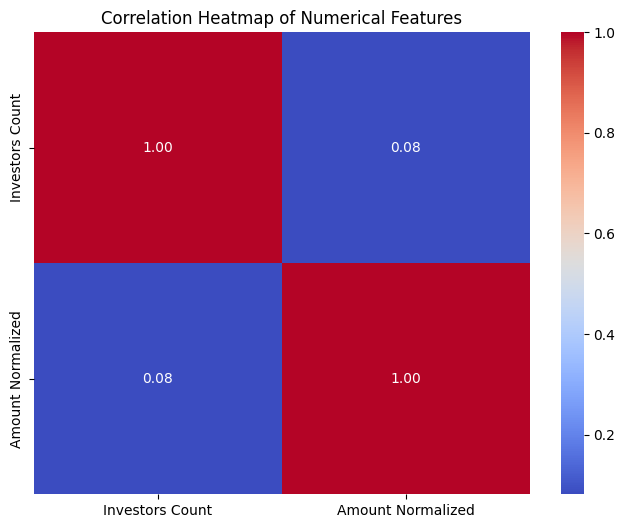

In [99]:
# Select only the numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

From the correlation heat map we find that the investors count does not affect the amount of funding for the firm.
hence a very weak positive correlation

# Feature transformation
Encoding the categorical data

In [102]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Categories'] = label_encoder.fit_transform(df['Categories'])
df

,Website Domain,Financing Type Normalized,Categories,Investors,Investors Count,Amount Normalized
0,trafigura.com,seed,2,0,1.0,1900000000
1,zenobe.com,seed,2,2,9.0,522700000
2,zenobe.com,seed,2,0,1.0,53671000
3,canva.com,seed,2,10,1.0,8000000
4,fidelity.com,seed,2,3,1.0,1960000
5,swtchenergy.com,series_b,6,1,2.0,27200000
6,carnow.com,seed,0,9,1.0,40000000
7,databricks.com,series_i,7,0,1.0,685000000
8,anthropic.com,seed,2,5,1.0,50000000
9,ey.com,seed,2,0,1.0,6865000


In [104]:
df['Investors'] = label_encoder.fit_transform(df['Investors'])
df

,Website Domain,Financing Type Normalized,Categories,Investors,Investors Count,Amount Normalized
0,trafigura.com,seed,2,0,1.0,1900000000
1,zenobe.com,seed,2,2,9.0,522700000
2,zenobe.com,seed,2,0,1.0,53671000
3,canva.com,seed,2,10,1.0,8000000
4,fidelity.com,seed,2,3,1.0,1960000
5,swtchenergy.com,series_b,6,1,2.0,27200000
6,carnow.com,seed,0,9,1.0,40000000
7,databricks.com,series_i,7,0,1.0,685000000
8,anthropic.com,seed,2,5,1.0,50000000
9,ey.com,seed,2,0,1.0,6865000


In [107]:
df['Website Domain'] = label_encoder.fit_transform(df['Website Domain'])
df

,Website Domain,Financing Type Normalized,Categories,Investors,Investors Count,Amount Normalized
0,18,seed,2,0,1.0,1900000000
1,19,seed,2,2,9.0,522700000
2,19,seed,2,0,1.0,53671000
3,2,seed,2,10,1.0,8000000
4,8,seed,2,3,1.0,1960000
5,15,series_b,6,1,2.0,27200000
6,3,seed,0,9,1.0,40000000
7,5,series_i,7,0,1.0,685000000
8,0,seed,2,5,1.0,50000000
9,7,seed,2,0,1.0,6865000


In [108]:
df['Financing Type Normalized'] = label_encoder.fit_transform(df['Financing Type Normalized'])
df


,Website Domain,Financing Type Normalized,Categories,Investors,Investors Count,Amount Normalized
0,18,0,2,0,1.0,1900000000
1,19,0,2,2,9.0,522700000
2,19,0,2,0,1.0,53671000
3,2,0,2,10,1.0,8000000
4,8,0,2,3,1.0,1960000
5,15,3,6,1,2.0,27200000
6,3,0,0,9,1.0,40000000
7,5,4,7,0,1.0,685000000
8,0,0,2,5,1.0,50000000
9,7,0,2,0,1.0,6865000


Revisualizing the data again

Correlation Matrix (All Features):


,Website Domain,Financing Type Normalized,Categories,Investors,Investors Count,Amount Normalized
Website Domain,1.000000,-0.067309,0.004288,-0.395517,0.318629,0.070402
Financing Type Normalized,-0.067309,1.000000,0.907955,-0.182154,-0.030002,0.045921
Categories,0.004288,0.907955,1.000000,-0.285981,-0.039674,0.009597
Investors,-0.395517,-0.182154,-0.285981,1.000000,-0.024448,0.178957
Investors Count,0.318629,-0.030002,-0.039674,-0.024448,1.000000,0.081165
Amount Normalized,0.070402,0.045921,0.009597,0.178957,0.081165,1.000000


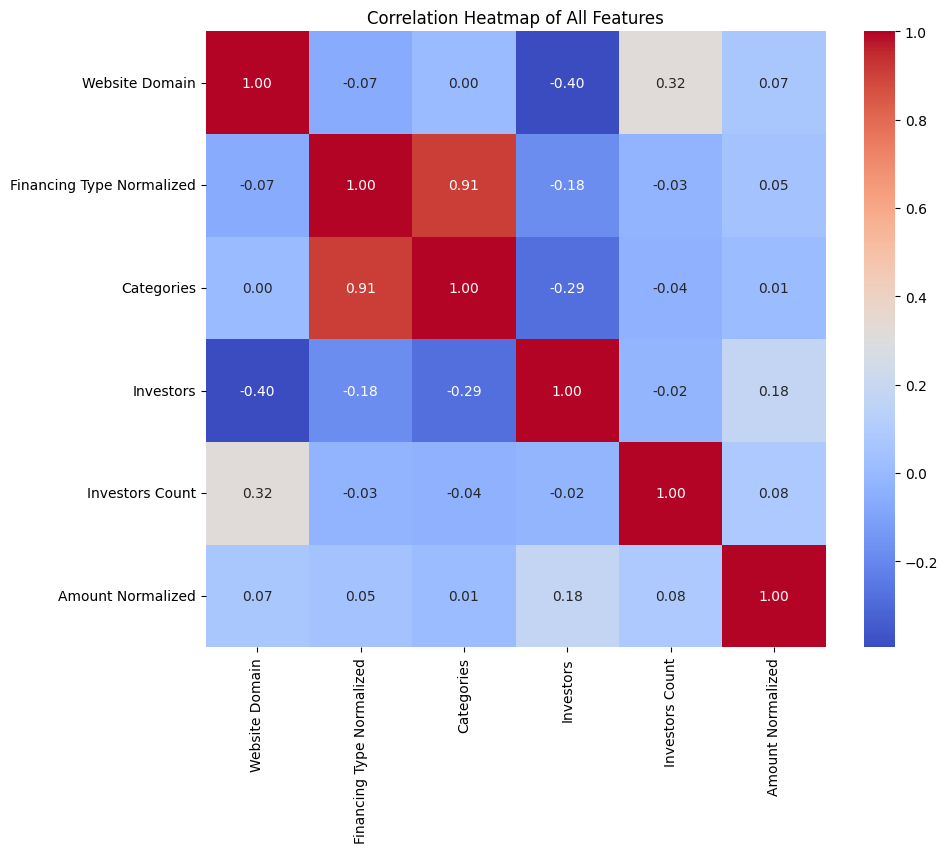

In [109]:
# Calculate the correlation matrix for all features
correlation_matrix_all = df.corr()

# Display the correlation matrix
print("Correlation Matrix (All Features):")
display(correlation_matrix_all)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Features')
plt.show()

The following are observed
1. Financing Type Normalized and Categories: There is a very strong positive correlation (0.91) between 'Financing Type Normalized' and 'Categories'.
2. Investors and Amount Normalized: There is a weak positive correlation (0.18) between 'Investors' (which are now encoded) and 'Amount Normalized'. This suggests a slight tendency for companies with a different distribution of investors (as represented by the encoded values) to have slightly different funding amounts, but the relationship is not strong.
3. Most other correlations are close to zero, indicating weak linear relationships between those pairs of features. For example, 'Website Domain' has very weak correlations with all other features. 'Investors Count' also shows weak correlations with most features, including 'Amount Normalized' (0.08), as we observed in the previous plot.

from the observation on website domain we can drop that feature

In [110]:
df.drop(columns=['Website Domain'], inplace=True)
df

,Financing Type Normalized,Categories,Investors,Investors Count,Amount Normalized
0,0,2,0,1.0,1900000000
1,0,2,2,9.0,522700000
2,0,2,0,1.0,53671000
3,0,2,10,1.0,8000000
4,0,2,3,1.0,1960000
5,3,6,1,2.0,27200000
6,0,0,9,1.0,40000000
7,4,7,0,1.0,685000000
8,0,2,5,1.0,50000000
9,0,2,0,1.0,6865000


Data preprocessing is a crucial step in real-world data analysis for several key reasons:

1. Handling Missing Data: Real-world datasets often have missing values, which can lead to biased results or errors in analysis and modeling. Preprocessing techniques like imputation or removal of rows/columns with missing data are essential to address this.
2. Dealing with Noisy Data: Data can contain errors, outliers, or inconsistencies (noise). Preprocessing helps to smooth or remove this noise, improving the accuracy and reliability of the analysis.
3. Transforming Data: Data may need to be transformed to be suitable for certain analytical methods or models. This includes scaling numerical data, encoding categorical variables (as we did in this notebook), and handling different data types.
4. Reducing Dimensionality: Datasets can have a large number of features, some of which may be irrelevant or redundant. Preprocessing techniques like feature selection or dimensionality reduction can help simplify the data and improve model performance.
5. Ensuring Data Consistency: Real-world data can come from various sources and may not be in a consistent format. Preprocessing helps to standardize the data, making it easier to integrate and analyze.
6. Improving Model Performance: Machine learning models are highly sensitive to the quality and format of the input data. Proper preprocessing can significantly improve the accuracy, efficiency, and stability of these models.